In [2]:
 criba_wiki<- function(m){ 
    primos <- data.frame(t(rep(TRUE,m)))
    names(primos) <- 1:m
    for (i in seq(2,1+as.integer(sqrt(m)))){
        if (primos[1,i] == TRUE){
            primos[seq(i,m,i)[-1]] = FALSE
        } 
    }
    return (which(primos == TRUE)[-1])
}

criba <- function(n){
    list = (2:n)
    for (i in 1:as.integer(sqrt(n))){
        nprimos <- seq(list[i],list[length(list)],list[i])[-1]
        list <- list[!(list %in% nprimos)]}
    return(list)
    }
print("criba_wiki")
(criba_wiki(500))
print("criba")
(criba(500))

[1] "criba_wiki"


[1]   2   3   5   7  11  13  17  19  23  29  31  37  41  43  47  53  59  61  67
[20]  71  73  79  83  89  97 101 103 107 109 113 127 131 137 139 149 151 157 163
[39] 167 173 179 181 191 193 197 199 211 223 227 229 233 239 241 251 257 263 269
[58] 271 277 281 283 293 307 311 313 317 331 337 347 349 353 359 367 373 379 383
[77] 389 397 401 409 419 421 431 433 439 443 449 457 461 463 467 479 487 491 499

[1] "criba"


[1]   2   3   5   7  11  13  17  19  23  29  31  37  41  43  47  53  59  61  67
[20]  71  73  79  83  89  97 101 103 107 109 113 127 131 137 139 149 151 157 163
[39] 167 173 179 181 191 193 197 199 211 223 227 229 233 239 241 251 257 263 269
[58] 271 277 281 283 293 307 311 313 317 331 337 347 349 353 359 367 373 379 383
[77] 389 397 401 409 419 421 431 433 439 443 449 457 461 463 467 479 487 491 499

user.self,sys.self,elapsed,user.child,sys.child,
0.000,0.000,0.000,0,0,3
0.001,0.000,0.001,0,0,529
0.002,0.001,0.002,0,0,1055
0.003,0.003,0.007,0,0,1581
0.003,0.002,0.005,0,0,2107
0.006,0.004,0.011,0,0,2633
0.006,0.003,0.010,0,0,3159
0.009,0.012,0.022,0,0,3686
0.005,0.002,0.007,0,0,4212
0.006,0.001,0.008,0,0,4738


user.self,sys.self,elapsed,user.child,sys.child,
0.001,0.001,0.001,0,0,3
0.050,0.003,0.053,0,0,529
0.136,0.006,0.143,0,0,1055
0.246,0.007,0.270,0,0,1581
0.323,0.003,0.335,0,0,2107
0.483,0.008,0.499,0,0,2633
0.623,0.006,0.635,0,0,3159
0.921,0.027,0.966,0,0,3686
0.985,0.006,0.999,0,0,4212
1.291,0.013,1.327,0,0,4738


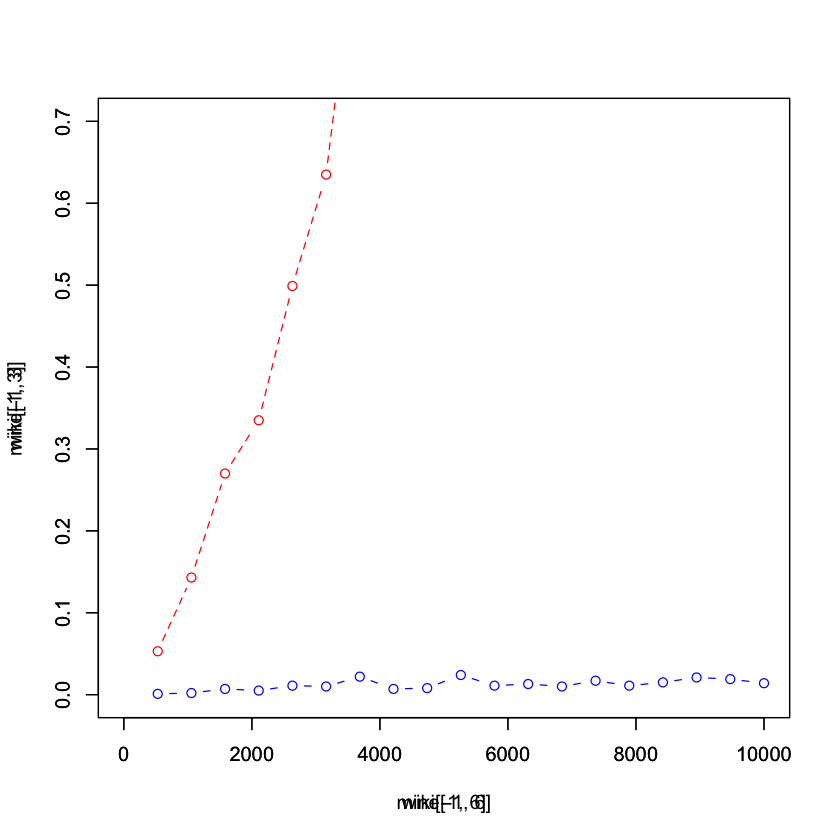

In [3]:
timetotime <- function(FUN,maxiter){
    time <- matrix(ncol=6)
    for (n in seq(3,maxiter,length.out=20)){
        ptm <-proc.time()
        FUN(as.integer(n))
        ptm <- proc.time() - ptm
        ptm <- c(ptm,as.integer(n))
        time <- rbind(time,c(ptm))
        }
    return(time[-1,])
}

maxiter=5000
wiki <- timetotime(criba,maxiter)
mine <- timetotime(criba_wiki,maxiter)
wiki
mine

plot(wiki[-1,6],wiki[-1,3],lty=2,xlim=c(2,maxiter),ylim=c(0,0.7),type="b",col="blue")
par(new=TRUE)
plot(mine[-1,6],mine[-1,3],lty=2,xlim=c(2,maxiter),ylim=c(0,0.7),type="b",col="red")

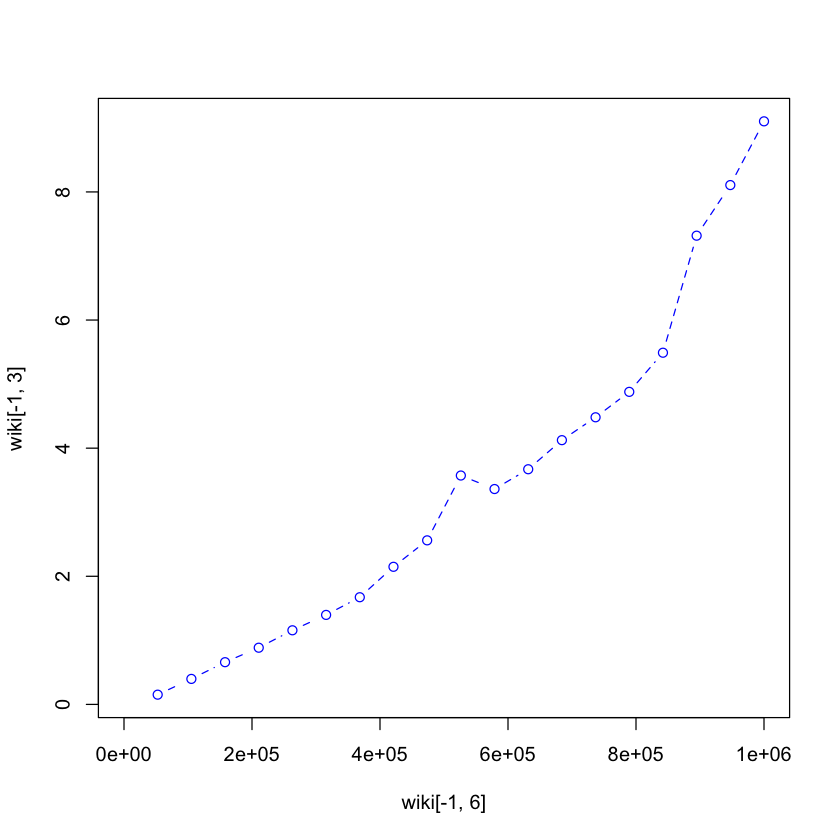

In [11]:
maxiter=1000000
wiki <- timetotime(criba,maxiter)
plot(wiki[-1,6],wiki[-1,3],lty=2,xlim=c(2,maxiter),type="b",col="blue")

In [73]:
library(splines)

data<- data.frame(cbind(wiki[-1,3],wiki[-1,6]))
names(data) <- c("y","x")
summary(data)
linear <- lm(y~x,data)

linear$coefficients

       y               x          
 Min.   :0.152   Min.   :  52634  
 1st Qu.:1.277   1st Qu.: 289476  
 Median :3.362   Median : 526317  
 Mean   :3.428   Mean   : 526317  
 3rd Qu.:4.681   3rd Qu.: 763158  
 Max.   :9.102   Max.   :1000000  

(Intercept)             x 
-1.108741e+00  8.620392e-06

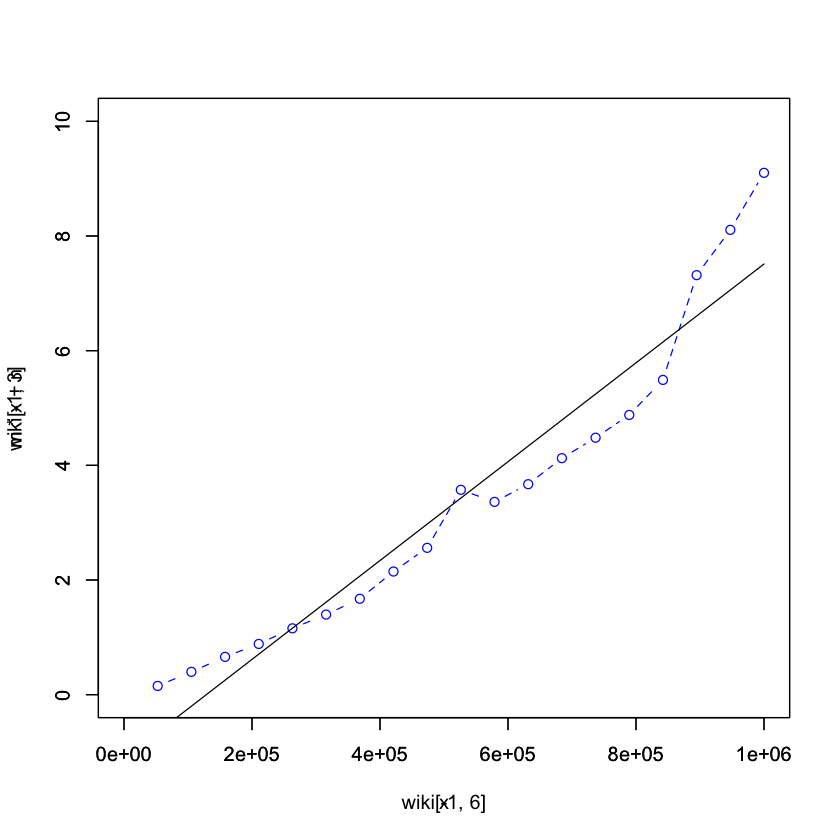

In [80]:
m <- linear$coefficients[2]
n <- linear$coefficients[1]
plot(wiki[-1,6],wiki[-1,3],lty=2,xlim=c(2,maxiter),ylim=c(0,10),type="b",col="blue")
par(new=TRUE)
curve(m*x+n,xlim=c(2,maxiter),ylim=c(0,10))

       y               x          
 Min.   :0.152   Min.   :  52634  
 1st Qu.:1.277   1st Qu.: 289476  
 Median :3.362   Median : 526317  
 Mean   :3.428   Mean   : 526317  
 3rd Qu.:4.681   3rd Qu.: 763158  
 Max.   :9.102   Max.   :1000000  


Call:
lm(formula = y ~ x^2 + x, data = data)

Coefficients:
(Intercept)            x  
 -1.109e+00    8.620e-06  


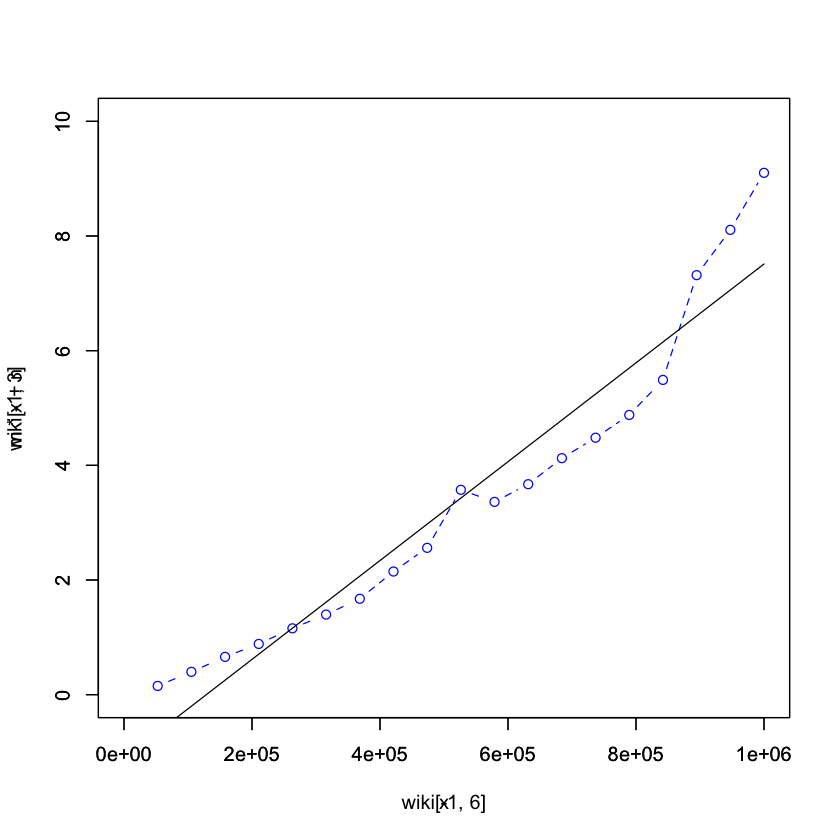

In [84]:
data<- data.frame(cbind(wiki[-1,3],wiki[-1,6]))
names(data) <- c("y","x")
summary(data)
linear <- lm(y~x^2+x,data)
linear
m <- linear$coefficients[2]
n <- linear$coefficients[1]
plot(wiki[-1,6],wiki[-1,3],lty=2,xlim=c(2,maxiter),ylim=c(0,10),type="b",col="blue")
par(new=TRUE)
curve(m*x+n,xlim=c(2,maxiter),ylim=c(0,10))